In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')

from RothC_Py import RothC

In [3]:
# program RothC_Python
import os

   
# set initial pool values   
DPM = [0.0]
RPM = [0.0]
BIO = [0.0]
HUM = [0.0]
SOC = [0.0]

DPM_Rage = [0.0]
RPM_Rage = [0.0]
BIO_Rage = [0.0]
HUM_Rage = [0.0]
IOM_Rage = [50000.0]  

# set initial soil water content (deficit) 
SWC = [0.0]
TOC1=0.0
   
# read in RothC input data file
df_head = pd.read_csv('/Users/alexnaokiasatokobayashi/git/RothC_Py/RothC_input.dat', skiprows = 3, header = 0, nrows = 1, index_col=None, delim_whitespace=True) 
clay = df_head.loc[0,"clay"]
depth = df_head.loc[0,"depth"]
IOM = [df_head.loc[0,"iom"]]
nsteps = df_head.loc[0,"nsteps"]
df = pd.read_csv('/Users/alexnaokiasatokobayashi/git/RothC_Py/RothC_input.dat', skiprows = 6, header = 0, index_col=None, delim_whitespace=True)
print (df)
df.columns =['t_year', 't_month', 't_mod', 't_tmp','t_rain','t_evap', 't_C_Inp', 't_FYM_Inp', 't_PC', 't_DPM_RPM']
  

     year  month  modern    Tmp  Rain   Evap   C_inp  FYM  PC  DPM_RPM
0       1      1   100.0   3.73  52.2    6.6  0.0000    0   1     1.44
1       1      2   100.0   3.08  42.9   17.3  0.0000    0   1     1.44
2       1      3   100.0   5.49  35.2   40.7  0.0000    0   1     1.44
3       1      4   100.0   7.40  52.0   70.5  0.0000    0   1     1.44
4       1      5   100.0  10.94  64.9  103.5  0.0000    0   1     1.44
..    ...    ...     ...    ...   ...    ...     ...  ...  ..      ...
835  2007      8   106.8  15.66  49.2  101.1  1.9742    0   1     1.44
836  2007      9   106.8  13.80  21.2   63.0  0.0000    0   0     1.44
837  2007     10   106.8  10.58  78.4   21.0  0.0000    0   0     1.44
838  2007     11   106.8   6.72  53.1    9.3  0.0000    0   1     1.44
839  2007     12   106.8   4.63  52.5    5.6  0.0000    0   1     1.44

[840 rows x 10 columns]


/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_65478/106646937.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_head = pd.read_csv('/Users/alexnaokiasatokobayashi/git/RothC_Py/RothC_input.dat', skiprows = 3, header = 0, nrows = 1, index_col=None, delim_whitespace=True)
/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_65478/106646937.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/Users/alexnaokiasatokobayashi/git/RothC_Py/RothC_input.dat', skiprows = 6, header = 0, index_col=None, delim_whitespace=True)


In [6]:
    
# run RothC to equilibrium     
k = -1
j = -1
      
SOC[0] = DPM[0]+RPM[0]+BIO[0]+HUM[0]+IOM[0]

print (j, DPM[0], RPM[0], BIO[0], HUM[0], IOM[0], SOC[0])

timeFact = 12
    
test = 100.0
while (test > 1E-6):
    k = k + 1
    j = j + 1 

    if( k == timeFact):
        k = 0
    
    TEMP = df.t_tmp[k]
    RAIN = df.t_rain[k]
    PEVAP =df.t_evap[k]
    
    PC = df.t_PC[k]
    DPM_RPM = df.t_DPM_RPM[k]
    
    C_Inp = df.t_C_Inp[k]
    FYM_Inp = df.t_FYM_Inp[k]
    
    modernC = df.t_mod[k] / 100.0   

    Total_Rage=[0.0]

    RothC(timeFact, DPM,RPM,BIO,HUM,IOM, SOC, DPM_Rage, RPM_Rage, BIO_Rage, HUM_Rage, Total_Rage, \
        modernC, clay, depth,TEMP,RAIN,PEVAP,PC,DPM_RPM, C_Inp, FYM_Inp, SWC)  
        
    #each a year calculates the difference between previous year and current year (counter =12 monthly model)
    if (np.mod(k+1, timeFact)== 0):
        TOC0 = TOC1
        TOC1 =DPM[0]+RPM[0]+BIO[0]+HUM[0]
        test = abs(TOC1-TOC0)            
         
Total_Delta = (np.exp(-Total_Rage[0]/8035.0) - 1.0) * 1000.0     
      
print( j, DPM[0], RPM[0], BIO[0], HUM[0], IOM[0], SOC[0], Total_Delta)

year_list = [[1, j+1, DPM[0], RPM[0], BIO[0], HUM[0], IOM[0], SOC[0], Total_Delta[0]]]

month_list = []        

for  i in range(timeFact, nsteps):
  
    TEMP = df.t_tmp[i]
    RAIN = df.t_rain[i]
    PEVAP =df.t_evap[i]
    
    PC = df.t_PC[i]
    DPM_RPM = df.t_DPM_RPM[i]
    
    C_Inp = df.t_C_Inp[i]
    FYM_Inp = df.t_FYM_Inp[i]
    
    modernC = df.t_mod[i] / 100.0
    
    RothC(timeFact, DPM,RPM,BIO,HUM,IOM, SOC, DPM_Rage, RPM_Rage, BIO_Rage, HUM_Rage, Total_Rage, \
          modernC, clay, depth,TEMP,RAIN,PEVAP,PC,DPM_RPM, C_Inp, FYM_Inp, SWC)  
         
    Total_Delta = (np.exp(-Total_Rage[0]/8035.0) - 1.0) * 1000.0
    
    # print(C_Inp, FYM_Inp, TEMP, RAIN, PEVAP, SWC[0],  PC,  DPM[0],RPM[0],BIO[0],HUM[0], IOM[0], SOC[0])
    
    month_list.insert(i-timeFact, [df.loc[i,"t_year"],df.loc[i,"t_month"], DPM[0],RPM[0],BIO[0],HUM[0], IOM[0], SOC[0], Total_Delta[0]])
        
    if(df.t_month[i] == timeFact):
        timeFact_index = int(i/timeFact)   
        year_list.insert(timeFact_index, [df.loc[i,"t_year"],df.loc[i,"t_month"], DPM[0],RPM[0],BIO[0],HUM[0], IOM[0], SOC[0], Total_Delta[0]])
        # print( i, DPM, RPM, BIO, HUM, IOM, SOC, Total_Delta)

output_years = pd.DataFrame(year_list, columns=["Year","Month","DPM_t_C_ha","RPM_t_C_ha","BIO_t_C_ha","HUM_t_C_ha","IOM_t_C_ha","SOC_t_C_ha","deltaC"])     
output_months = pd.DataFrame(month_list, columns=["Year","Month","DPM_t_C_ha","RPM_t_C_ha","BIO_t_C_ha","HUM_t_C_ha","IOM_t_C_ha","SOC_t_C_ha","deltaC"])


-1 0.1858764195450398 6.370323733617322 0.8285620578602865 27.80280913518365 3.0041 38.1916713462063
12275 0.14546618698414293 5.678120858752469 0.7405946484427919 27.643036889036104 3.0041 37.21131858321551 [-93.31626743]


<Axes: xlabel='Year'>

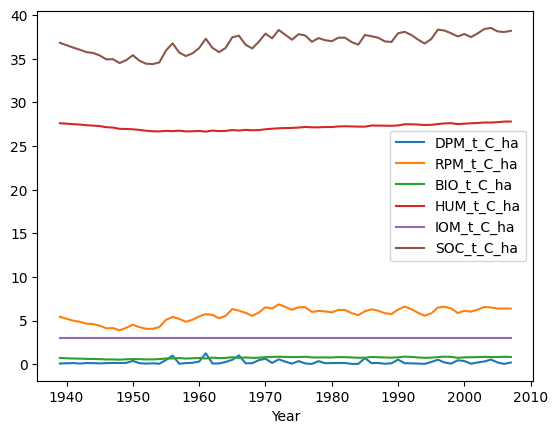

In [13]:
output_years.loc[output_years['Year']>1900,['Year','DPM_t_C_ha','RPM_t_C_ha','BIO_t_C_ha','HUM_t_C_ha','IOM_t_C_ha','SOC_t_C_ha',]].plot(x='Year')

In [16]:
output_original_years = pd.read_csv("/Users/alexnaokiasatokobayashi/git/RothC_Py/year_results2.csv")

<Axes: xlabel='Year'>

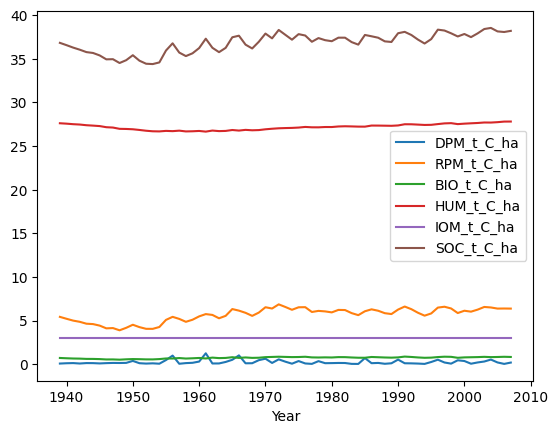

In [18]:
output_original_years.loc[output_original_years['Year']>1900,['Year','DPM_t_C_ha','RPM_t_C_ha','BIO_t_C_ha','HUM_t_C_ha','IOM_t_C_ha','SOC_t_C_ha',]].plot(x='Year')

<Axes: xlabel='Year'>

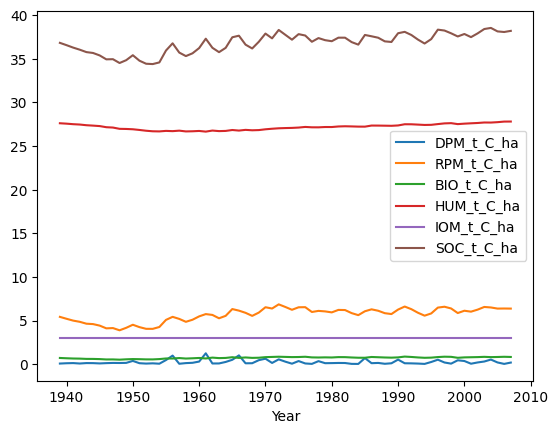

In [19]:
output_refactor_years = pd.read_csv("/Users/alexnaokiasatokobayashi/git/RothC_Py/year_results3.csv")
output_refactor_years.loc[output_refactor_years['Year']>1900,['Year','DPM_t_C_ha','RPM_t_C_ha','BIO_t_C_ha','HUM_t_C_ha','IOM_t_C_ha','SOC_t_C_ha',]].plot(x='Year')